In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# load dataset
dataset = load_breast_cancer()

# convert dataset to DataFrame
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
X = df.drop(['target'], axis=1)
y = df['target']

# display names of features and targets
print(f"Feature Names: {dataset.feature_names}")
print(f"Target Names: {dataset.target_names}")

# print(f"[ Data Information ]")
# print(df.info())
# print(f"\n[ Statistics ]\n{df.describe()}")
# print(f"\n[ Dataset ]\n{df}")

Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target Names: ['malignant' 'benign']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create model
model = LogisticRegression(max_iter=4000)

# train model
model.fit(X_train_scaled, y_train)

# test model
y_pred = model.predict(X_test_scaled)

# evaluate model
accuracy = accuracy_score(y_test, y_pred)

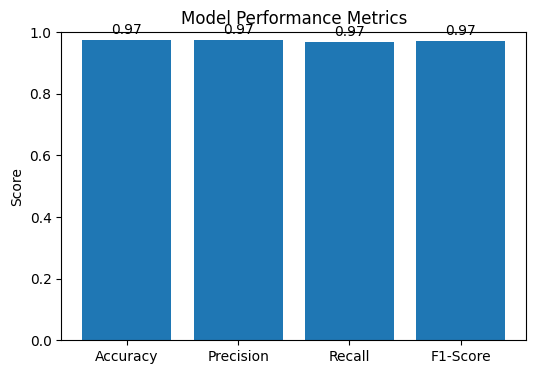

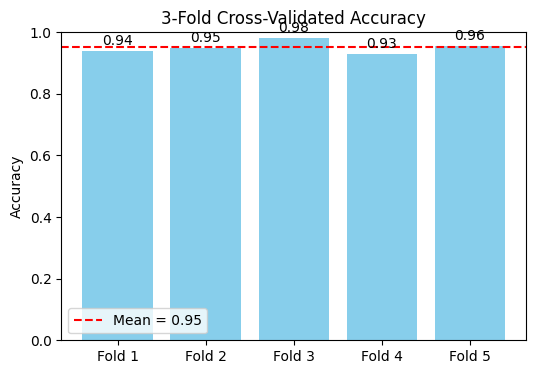

In [5]:
# display model performance
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average="macro"),
    "Recall": recall_score(y_test, y_pred, average="macro"),
    "F1-Score": f1_score(y_test, y_pred, average="macro")
}

plt.figure(figsize=(6,4))
bars = plt.bar(metrics.keys(), metrics.values())
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Metrics")

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}", 
             ha='center', va='bottom', fontsize=10)
    
plt.show()

# 3-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Plot CV scores
plt.figure(figsize=(6,4))
folds = [f"Fold {i+1}" for i in range(len(scores))]
plt.bar(folds, scores, color='skyblue')
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("3-Fold Cross-Validated Accuracy")

# Add value labels on top
for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center', va='bottom', fontsize=10)

# Plot mean line
plt.axhline(scores.mean(), color='red', linestyle='--', label=f"Mean = {scores.mean():.2f}")
plt.legend()
plt.show()

In [6]:
joblib.dump(model, 'models/logreg_breast_cancer.joblib')

['models/logreg_breast_cancer.joblib']